In [20]:
import sys

# need to add cocpit dir to path - can't relative import with sister directory
sys.path.insert(0, "..")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cocpit

sns.set_style("whitegrid")

%load_ext autoreload
%autoreload 2

plt_params = {
    "axes.labelsize": "large",
    "axes.titlesize": "large",
    "xtick.labelsize": "large",
    "ytick.labelsize": "large",
    "legend.title_fontsize": 12,
}
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(plt_params)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


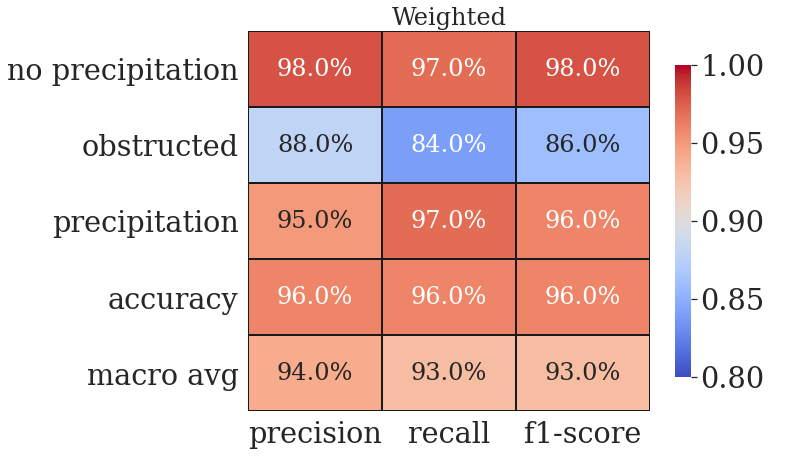

In [21]:
clf_report = pd.read_csv(
    "/ai2es/saved_accuracies/v0.0.0/val_metrics_e30_bs64_k0_1model(s).csv",
    index_col=0,
).drop(columns=["model", "fold"])
save_name = "/ai2es/plots/unweighted_classification_report_combined.png"


cocpit.plotting_scripts.classification_report.classification_report_classes(
    clf_report, save_name=save_name, save_fig=True
)  